In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import scipy.stats as sps

%matplotlib inline

plt.style.use('seaborn-darkgrid')

In [14]:
df = pd.read_csv('~/git/data-science/naive-bayes.csv')
df

,Height (ft),Weight (lbs),Shoe Size (in),Gender
0,6.00,180,12,male
1,5.92,190,11,male
2,5.58,170,12,male
3,5.92,165,10,male
4,5.00,100,6,female
5,5.50,150,8,female
6,5.42,130,7,female
7,5.75,150,9,female


In [15]:
df_normalized = df.copy()
height = df_normalized['Height (ft)']
height = (height - height.mean()) / (height.max() - height.min())
df_normalized['Height (ft)'] = height
df_normalized

,Height (ft),Weight (lbs),Shoe Size (in),Gender
0,0.36375,180,12,male
1,0.28375,190,11,male
2,-0.05625,170,12,male
3,0.28375,165,10,male
4,-0.63625,100,6,female
5,-0.13625,150,8,female
6,-0.21625,130,7,female
7,0.11375,150,9,female


In [16]:
df.describe()

,Height (ft),Weight (lbs),Shoe Size (in)
count,8.000000,8.000000,8.000000
mean,5.636250,154.375000,9.375000
std,0.333721,28.962722,2.263846
min,5.000000,100.000000,6.000000
25%,5.480000,145.000000,7.750000
50%,5.665000,157.500000,9.500000
75%,5.920000,172.500000,11.250000
max,6.000000,190.000000,12.000000


#### Usando como clasificador un modelo gaussiano ingenuo, las distribuciones de las categorías condicionadas por las clases (_hombre_ o _mujer_) serán gaussianas.

In [17]:
parameters = df.groupby('Gender').agg(['mean', 'std'])
parameters

Height (ft)           Weight (lbs)            Shoe Size (in)          
              mean       std         mean        std           mean       std
Gender                                                                       
female      5.4175  0.311809       132.50  23.629078           7.50  1.290994
male        5.8550  0.187172       176.25  11.086779          11.25  0.957427

In [18]:
parameters_male = parameters.loc['male']
parameters_female = parameters.loc['female']

male_height_params = parameters_male['Height (ft)']
female_height_params = parameters_female['Height (ft)']

male_weight_params = parameters_male['Weight (lbs)']
female_weight_params = parameters_female['Weight (lbs)']

male_shoe_params = parameters_male['Shoe Size (in)']
female_shoe_params = parameters_female['Shoe Size (in)']

\begin{align}
p\left( male \mid height, weight, shoe \right) & \propto p\left( male \right) p\left( height \mid male \right) p\left( weight \mid male \right) p\left( shoe \mid male \right) \\
\
& \propto p\left( male \right) \mathcal{N} \left( height \mid \mu_{hm},\sigma_{hm} \right) \mathcal{N} \left( weight \mid \mu_{wm},\sigma_{wm} \right) \mathcal{N} \left( shoe \mid \mu_{sm},\sigma_{sm} \right)
\\
\\
p\left( female \mid height, weight, shoe \right) & \propto p\left( female \right) p\left( height \mid female \right) p\left( weight \mid female \right) p\left( shoe \mid female \right) \\
\
& \propto p\left( female \right) \mathcal{N} \left( height \mid \mu_{hf},\sigma_{hf} \right) \mathcal{N} \left( weight \mid \mu_{wf},\sigma_{wf} \right) \mathcal{N} \left( shoe \mid \mu_{sf},\sigma_{sf} \right) \\
\\
p\left( female \right) = p\left( male \right) = 0.5
\end{align}

In [19]:
x_height = np.linspace(4,7,1000)
pdf_height_male = sps.norm.pdf(x_height, male_height_params['mean'], male_height_params['std'])
pdf_height_female = sps.norm.pdf(x_height, female_height_params['mean'], female_height_params['std'])

x_weight = np.linspace(50,250,1000)
pdf_weight_male = sps.norm.pdf(x_weight, male_weight_params['mean'], male_weight_params['std'])
pdf_weight_female = sps.norm.pdf(x_weight, female_weight_params['mean'], female_weight_params['std'])

x_shoe = np.linspace(0,20,1000)
pdf_shoe_male = sps.norm.pdf(x_shoe, male_shoe_params['mean'], male_shoe_params['std'])
pdf_shoe_female = sps.norm.pdf(x_shoe, female_shoe_params['mean'], female_shoe_params['std'])

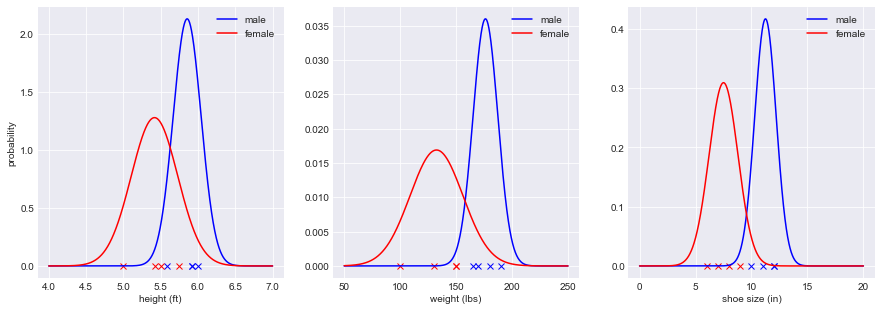

In [20]:
args_male = {'color': 'b', 'label': 'male', 'lw': 1.5}
args_female = {'color': 'r', 'label': 'female', 'lw': 1.5}

plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1, 3, 1)

male_heights = df[df['Gender'] == 'male']['Height (ft)']
female_heights = df[df['Gender'] == 'female']['Height (ft)']

plt.plot(male_heights, np.zeros_like(male_heights), 'xb')
plt.plot(female_heights, np.zeros_like(female_heights), 'xr')

plt.plot(x_height, pdf_height_male, **args_male)
plt.plot(x_height, pdf_height_female, **args_female)

plt.xlabel('height (ft)')
plt.ylabel('probability')

plt.legend()

plt.subplot(1, 3, 2)

male_weights = df[df['Gender'] == 'male']['Weight (lbs)']
female_weights = df[df['Gender'] == 'female']['Weight (lbs)']

plt.plot(male_weights, np.zeros_like(male_weights), 'xb')
plt.plot(female_weights, np.zeros_like(female_weights), 'xr')

plt.plot(x_weight, pdf_weight_male, **args_male)
plt.plot(x_weight, pdf_weight_female, **args_female)

plt.xlabel('weight (lbs)')

plt.legend()

plt.subplot(1, 3, 3)

male_shoes = df[df['Gender'] == 'male']['Shoe Size (in)']
female_shoes = df[df['Gender'] == 'female']['Shoe Size (in)']

plt.plot(male_shoes, np.zeros_like(male_shoes), 'xb')
plt.plot(female_shoes, np.zeros_like(female_shoes), 'xr')

plt.plot(x_shoe, pdf_shoe_male, **args_male)
plt.plot(x_shoe, pdf_shoe_female, **args_female)

plt.xlabel('shoe size (in)')

plt.legend()

plt.show()

In [28]:
height = 6
weight = 200
shoe_size = 8

prob_male = (0.5
              * sps.norm.pdf(height, male_height_params['mean'], male_height_params['std'])
              * sps.norm.pdf(weight, male_weight_params['mean'], male_weight_params['std'])
              * sps.norm.pdf(shoe_size, male_shoe_params['mean'], male_shoe_params['std']))

prob_female = (0.5
              * sps.norm.pdf(height, female_height_params['mean'], female_height_params['std'])
              * sps.norm.pdf(weight, female_weight_params['mean'], female_weight_params['std'])
              * sps.norm.pdf(shoe_size, female_shoe_params['mean'], female_shoe_params['std']))

print("female likelihood:\t{:10.20f}".format(prob_female))
print("male likelihood:\t{:10.20f}".format(prob_male))
print()
print(prob_female/prob_male)

female likelihood:	0.00000914166917041983
male likelihood:	0.00000375504879302519

2.43450076798
